In [1]:

#train(model,loss_func,X,y,epochs=1000,batch_size = 32,lr=0.01):
import sys
import os

PROJECT_ROOT = os.path.abspath("..")
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
from dynamic_architect import Neural_Network
from data.generate import generate_circle_data 
from layers import Linear 
from activations import ReLU , Sigmoid
from losses import BCE 
from train_loop import train ,show_loss
import numpy as np

np.set_printoptions(suppress=True) 
depth4 = Neural_Network([2,16,16,16,16,1]) 
model = depth4.layers 
X,y =  generate_circle_data(2000,0.5,42)
loss_func = BCE()
loss_history = train(model,loss_func,X,y,1000,32,0.001) 
batch_per_epoch = int(np.ceil(len(X) / 32))
epoch_loss = [
    np.mean(loss_history[i*batch_per_epoch:(i+1)*batch_per_epoch])
    for i in range(1000)
]
show_loss(epoch_loss ,50) 
 



EPOCHS : 0 | LOSS:  0.47150120800390494
EPOCHS : 50 | LOSS:  0.021118500579541403
EPOCHS : 100 | LOSS:  0.014674424274447621
EPOCHS : 150 | LOSS:  0.016761541616649077
EPOCHS : 200 | LOSS:  0.011307271426268112
EPOCHS : 250 | LOSS:  0.011507878675289492
EPOCHS : 300 | LOSS:  0.01088142763965815
EPOCHS : 350 | LOSS:  0.012566473322213303
EPOCHS : 400 | LOSS:  0.012033306800469473
EPOCHS : 450 | LOSS:  0.01425979230957551
EPOCHS : 500 | LOSS:  0.006269614901099027
EPOCHS : 550 | LOSS:  0.0068110901375505895
EPOCHS : 600 | LOSS:  0.008958003386638868
EPOCHS : 650 | LOSS:  0.007002594236021343
EPOCHS : 700 | LOSS:  0.007312580534909397
EPOCHS : 750 | LOSS:  0.007737302938417697
EPOCHS : 800 | LOSS:  0.00799362918152362
EPOCHS : 850 | LOSS:  0.005460864152337636
EPOCHS : 900 | LOSS:  0.012305063350716265
EPOCHS : 950 | LOSS:  0.006893436541168655


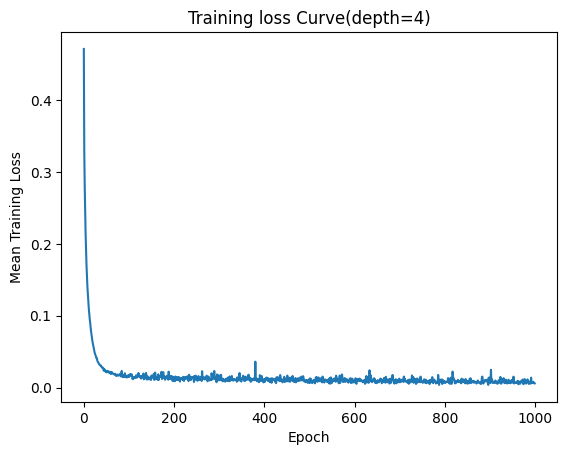

In [2]:
import matplotlib.pyplot as plt 
plt.plot(epoch_loss)
plt.xlabel("Epoch")
plt.ylabel("Mean Training Loss") 
plt.title("Training loss Curve(depth=4)")
plt.show()


In [3]:
last_100 = epoch_loss[900:]
for i in range(0,100,10): 
    print(" ".join(f"{x:8.4f}" for x in last_100[i:i+10]))

  0.0123   0.0063   0.0247   0.0085   0.0116   0.0100   0.0064   0.0075   0.0073   0.0073
  0.0081   0.0064   0.0098   0.0083   0.0073   0.0061   0.0053   0.0055   0.0079   0.0102
  0.0092   0.0068   0.0088   0.0148   0.0055   0.0055   0.0066   0.0114   0.0089   0.0088
  0.0130   0.0093   0.0061   0.0069   0.0065   0.0110   0.0074   0.0069   0.0056   0.0094
  0.0083   0.0109   0.0061   0.0075   0.0084   0.0061   0.0065   0.0092   0.0107   0.0071
  0.0069   0.0085   0.0152   0.0057   0.0064   0.0075   0.0073   0.0064   0.0066   0.0065
  0.0067   0.0094   0.0059   0.0045   0.0086   0.0062   0.0071   0.0054   0.0082   0.0094
  0.0088   0.0080   0.0111   0.0086   0.0046   0.0079   0.0115   0.0118   0.0060   0.0090
  0.0055   0.0078   0.0076   0.0114   0.0079   0.0067   0.0050   0.0072   0.0065   0.0089
  0.0054   0.0138   0.0067   0.0074   0.0069   0.0064   0.0080   0.0061   0.0062   0.0058


In [4]:
#tính accuracy
def Predict(X,model): 
    A = X 
    for layer in model: 
        A = layer.forward(A) 
    return A

y_hat = Predict(X,model) 
y_pred = (y_hat > 0.5).astype(int)
accuracy = np.mean(y_pred == y)
print(accuracy)

0.9965
